# Más análisis exploratorio

<Figure size 800x500 with 0 Axes>

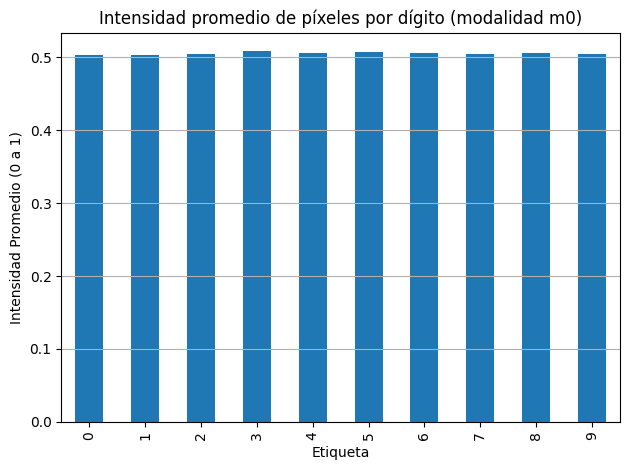

In [1]:
import numpy as np
from PIL import Image
from collections import defaultdict
import matplotlib.pyplot as plt
import os

# Ruta de una modalidad representativa
mod_path = "./train/m0"
intensity_by_label = defaultdict(list)

# Recorrer todas las imágenes de la modalidad m0
for file in os.listdir(mod_path):
    if file.endswith(".png"):
        label = file.split(".")[1]
        img = Image.open(os.path.join(mod_path, file)).convert("L")  # Escala de grises
        arr = np.array(img) / 255.0  # Normalizamos de 0 a 1
        mean_intensity = arr.mean()
        intensity_by_label[label].append(mean_intensity)

# Calcular intensidad promedio por etiqueta
avg_intensity = {label: np.mean(vals) for label, vals in intensity_by_label.items()}

# Convertir a DataFrame ordenado
import pandas as pd
df_intensity = pd.DataFrame.from_dict(avg_intensity, orient='index', columns=["Intensidad Promedio"])
df_intensity = df_intensity.sort_index()

# Gráfica
plt.figure(figsize=(8,5))
df_intensity.plot(kind='bar', legend=False)
plt.title("Intensidad promedio de píxeles por dígito (modalidad m0)")
plt.xlabel("Etiqueta")
plt.ylabel("Intensidad Promedio (0 a 1)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

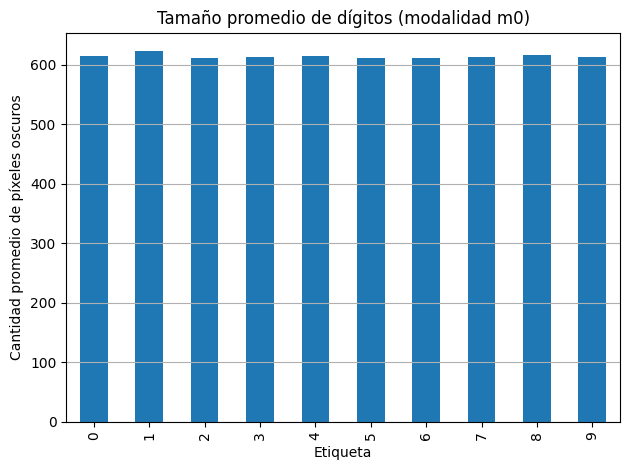

In [ ]:
from collections import defaultdict
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

modality = "m0"
path = f"./train/{modality}"
pixel_counts = defaultdict(list)

for file in os.listdir(path):
    if file.endswith(".png"):
        label = file.split(".")[1]
        img = Image.open(os.path.join(path, file)).convert("L")
        arr = np.array(img)
        black_pixels = np.sum(arr < 200)  # considera píxeles oscuros como parte del dígito
        pixel_counts[label].append(black_pixels)

# Calcular promedio por etiqueta
avg_pixels = {label: np.mean(vals) for label, vals in pixel_counts.items()}

# Plot
import pandas as pd
df_pixels = pd.DataFrame.from_dict(avg_pixels, orient='index', columns=["Pixeles oscuros promedio"])
df_pixels = df_pixels.sort_index()

plt.figure(figsize=(8, 5))
df_pixels.plot(kind="bar", legend=False)
plt.title(f"Tamaño promedio de dígitos (modalidad {modality})")
plt.xlabel("Etiqueta")
plt.ylabel("Cantidad promedio de píxeles oscuros")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
